**Step 1:     
Use Inverse Transform Sampling to generate the samples from the conditional distribution**

From $P(x|y) \propto ye^{-yx}$, $0 < x < B < \infty$, we have $\int_{0}^{B}Kye^{-yx} = 1$, so $K = \frac{1}{1-e^{-yB}}$

The CDF of this conditional distribution is $F(x|y) = \frac{1}{1-e^{-yB}} (1- e^{-yx})$

The inverse of this CDF is $F^{-1}_{(x|y)}(u) = -\frac{ln[1-u(1-e^{-yB})]}{y}$

Similarly, $F^{-1}_{(y|x)}(u) = -\frac{ln[1-u(1-e^{-xB})]}{x}$

We will use this inverse CDF to generate sample from the given conditonal distribution.

**Step 2:    
Use Gibbs sampler to estimate the marginal distribution, and store results in a matrix.**

In [23]:
import numpy as np

def InverseCDF(B,theta):
    u = np.random.random()
    K = 1/(1-np.exp(-theta*B))
    x = - np.log(1-u*(1/K))/theta
    return x

def gibbs(N,B,start_value):
    y = start_value
    Results = np.zeros((N,3))
    Results[:,0] = np.arange(1,N+1)
    for i in range(N):
        x = InverseCDF(B,y)
        y = InverseCDF(B,x)
        Results[i,1] = x
        Results[i,2] = y
    return Results
    

In [24]:
numpy.set_printoptions(suppress=True)
A = gibbs(500,5,1)

In [25]:
A

array([[   1.        ,    0.94753213,    1.20798663],
       [   2.        ,    0.90053472,    0.37082818],
       [   3.        ,    3.97754333,    0.10243929],
       ..., 
       [ 498.        ,    0.08244516,    2.50840595],
       [ 499.        ,    1.39730314,    0.4213034 ],
       [ 500.        ,    2.2775314 ,    0.55104361]])

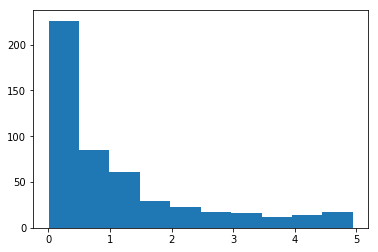

In [28]:
import matplotlib.pyplot as plt
plt.hist(A[:,1])
plt.show()

In [29]:
numpy.mean(A[:,1])

1.133391676104202